In [ ]:
import scipy.io
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
from skfeature.utility import unsupervised_evaluation
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_similarity_score
import matplotlib.pyplot as plt

In [73]:
def laplacianscore(x = "/home/renato/Proyectos/Proyecto1/ejex.csv", 
                   y = "/home/renato/Proyectos/Proyecto1/ejey.csv",k=5,t=1, nf = 100, nc = 20):

    # --- PARA LEER LOS CSV EN EJE X & Y
    X = pd.read_csv(x)
    y = pd.read_csv(y)
    X = X.values
    y = y.values[:, 0]
    y = y.astype(int)
    
    # construct affinity matrix
    kwargs_W = {"metric": "euclidean", "neighbor_mode": "knn", "weight_mode": "heat_kernel", "k": k, 't': t}
    W = construct_W.construct_W(X, **kwargs_W)


    """ obtiene los puntajes de las caracteristicas obtain the scores of featurs """
    score = lap_score.lap_score(X, W=W)
    
    # sort the feature scores in an ascending order according to the feature scores
    idx = lap_score.feature_ranking(score)
    
    # perform evaluation on clustering task
    num_fea = nf    # number of selected features
    num_cluster = nc    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]
    
    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
        nmi_total += nmi
        acc_total += acc
      
    # output the average NMI and average ACC
    NMI = float(nmi_total)/20 
    ACC = float(acc_total)/20
    
    
    return ACC

In [74]:
fun = laplacianscore()
fun

0.5630298818624044

[0.4833333333333332]
[0.4833333333333332, 0.6475000000000002]
[0.4833333333333332, 0.6475000000000002, 0.6466666666666667]
[0.4833333333333332, 0.6475000000000002, 0.6466666666666667, 0.7266666666666668]
[0.4833333333333332, 0.6475000000000002, 0.6466666666666667, 0.7266666666666668, 0.8166666666666667]
[0.4833333333333332, 0.6475000000000002, 0.6466666666666667, 0.7266666666666668, 0.8166666666666667, 0.8166666666666667]
[0.4833333333333332, 0.6475000000000002, 0.6466666666666667, 0.7266666666666668, 0.8166666666666667, 0.8166666666666667, 0.7675]
[0.4833333333333332, 0.6475000000000002, 0.6466666666666667, 0.7266666666666668, 0.8166666666666667, 0.8166666666666667, 0.7675, 0.7141666666666666]


<function matplotlib.pyplot.show>

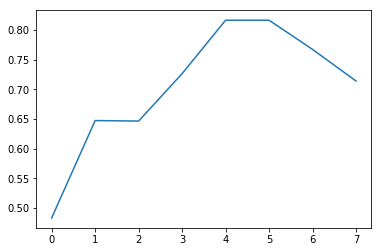

In [78]:
fun = []
for i in range(2,17,2):
    p = laplacianscore(x = "/home/renato/Proyectos/Proyecto1/virusesx.csv", y = "/home/renato/Proyectos/Proyecto1/virusesy.csv",
              nc = 4, nf = i)
    fun.append(p)
    print fun
    
plt.plot(fun)
plt.show

[0.6381944444444445]
[0.6381944444444445, 0.6541666666666668]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779, 0.7208333333333333]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779, 0.7208333333333333, 0.7180555555555557]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779, 0.7208333333333333, 0.7180555555555557, 0.6847222222222222]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779, 0.7208333333333333, 0.7180555555555557, 0.6847222222222222, 0.7006944444444446]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779, 0.7208333333333333, 0.7180555555555557, 0.6847222222222222, 0.7006944444444446, 0.6833333333333333]
[0.6381944444444445, 0.6541666666666668, 0.6625000000000001, 0.7152777777777779, 0.72083333

<function matplotlib.pyplot.show>

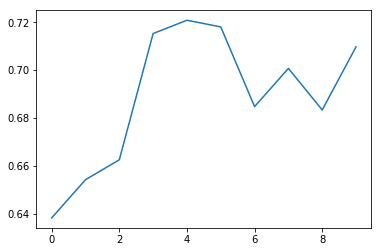

In [79]:
fun = []
for i in range(100,5000,500):
    p = laplacianscore(x = "/home/renato/Proyectos/Proyecto1/mll_x.csv", y = "/home/renato/Proyectos/Proyecto1/mll_y.csv",
              nc = 3, nf = i)
    fun.append(p)
    print fun

plt.plot(fun)
plt.show